# Lecture 9 Optimization in Neural Network

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data,spiral_data

In [2]:
nnfs.init()
X,y = vertical_data(samples=100,classes=3)

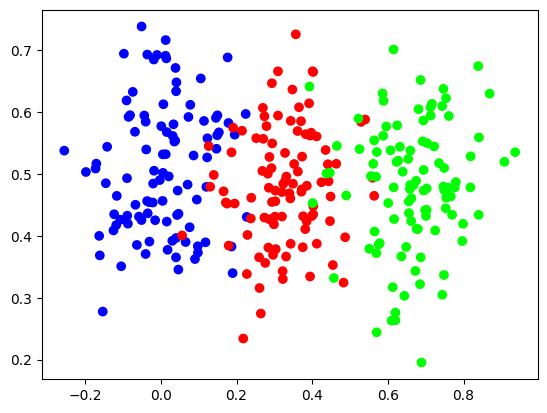

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')
plt.show()

In [4]:
# creating Dense Layer class 
class Dense:
    # layer initialization
    def __init__(self,n_inputs,n_neurons):
        # super().__init__()
        self.weights =  0.01*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))
    
    # forward pass of Dense Layer
    def forward(self,inputs):
        self.outputs = np.dot(inputs,self.weights) + self.biases

In [5]:
# creating relu class
class ReLU:
    # forward pass
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)

In [6]:
# creating softmax class
class Softmax:
    def forward(self,inputs):
        exp_values = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))
        probabelities = exp_values/ np.sum(exp_values,axis=1,keepdims=True)
        self.output = probabelities

In [7]:
class Loss:
    def calculate(self,output,y):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        return data_loss

In [8]:
class CrossEntropyLoss(Loss):
    def forward(self,y_pred,y_true):
        # number of samples in a batch
        samples = len(y_pred)
        # clip data to prevent division by 0
        # clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred,1e-7,1-1e-7)
        # probabelities for target values
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
            range(samples),
            y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped*y_true,axis=1
            )
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

# Strategy - 1 Choosing weights and biases randomly

selecting weights randomly

In [9]:
# create dense layer with 2 inputs and 3 neurons(output values)
layer_1 = Dense(2,3)
# create activation layer to be used with dense layer
activation_1 = ReLU()
# create second dense layer with 3 inputs and 3 neurons(output values)
layer_2 = Dense(3,3)
# create softmax to be used with dense layer
activation_2 = Softmax()
# creating a loss function
loss = CrossEntropyLoss()
# forward pass of first dense layer of our training data

# some helper variables
lowest_loss = 99999 #some initial values
best_dense_weights_1 = layer_1.weights.copy()
best_dense_biases_1 = layer_1.biases.copy()
best_dense_weights_2 = layer_2.weights.copy()
best_dense_biases_2 = layer_2.biases.copy()

for iteration in range(100000):
    layer_1.weights = 0.05*np.random.randn(2,3)
    layer_1.biases = 0.05*np.random.randn(1,3)
    layer_2.weights = 0.05*np.random.randn(3,3)
    layer_2.biases = 0.05*np.random.randn(1,3)

    layer_1.forward(X)
    # make forward pass with activation layer which makes makes first output of dense layer
    activation_1.forward(layer_1.outputs)
    # make the forward pass of second dense layer
    layer_2.forward(layer_1.outputs)
    # making forward pass of second activation layer which is softmax layer to detect probabelity
    activation_2.forward(layer_2.outputs)
    # printing output of classification
    losses = loss.calculate(activation_2.output,y)
    predictions = np.argmax(activation_2.output,axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y,axis=1)
    accuracy = np.mean(predictions == y)
    if losses < lowest_loss:
        print(f"New set of weights found Iteration: {iteration}, loss: {losses}, accuracy: {accuracy}")
        best_dense_weights_1 = layer_1.weights.copy()
        best_dense_biases_1 = layer_1.biases.copy()
        best_dense_weights_2 = layer_2.weights.copy()
        best_dense_biases_2 = layer_2.biases.copy()
        lowest_loss = losses

New set of weights found Iteration: 0, loss: 1.0988067388534546, accuracy: 0.3333333333333333
New set of weights found Iteration: 1, loss: 1.0981059074401855, accuracy: 0.3333333333333333
New set of weights found Iteration: 9, loss: 1.0980027914047241, accuracy: 0.3333333333333333
New set of weights found Iteration: 31, loss: 1.0979416370391846, accuracy: 0.3333333333333333
New set of weights found Iteration: 39, loss: 1.0974512100219727, accuracy: 0.3333333333333333
New set of weights found Iteration: 246, loss: 1.0971211194992065, accuracy: 0.3333333333333333
New set of weights found Iteration: 482, loss: 1.0970513820648193, accuracy: 0.3333333333333333
New set of weights found Iteration: 778, loss: 1.096801519393921, accuracy: 0.3333333333333333
New set of weights found Iteration: 983, loss: 1.0967044830322266, accuracy: 0.3333333333333333
New set of weights found Iteration: 1027, loss: 1.0959426164627075, accuracy: 0.3333333333333333
New set of weights found Iteration: 4233, loss: 

# Strategy - 2

adjusting weights and biases randomly

In [10]:
# create dense layer with 2 inputs and 3 neurons(output values)
layer_1 = Dense(2,3)
# create activation layer to be used with dense layer
activation_1 = ReLU()
# create second dense layer with 3 inputs and 3 neurons(output values)
layer_2 = Dense(3,3)
# create softmax to be used with dense layer
activation_2 = Softmax()
# creating a loss function
loss = CrossEntropyLoss()
# forward pass of first dense layer of our training data

# some helper variables
lowest_loss = 99999 #some initial values
best_dense_weights_1 = layer_1.weights.copy()
best_dense_biases_1 = layer_1.biases.copy()
best_dense_weights_2 = layer_2.weights.copy()
best_dense_biases_2 = layer_2.biases.copy()

for iteration in range(100000):
    # update weights with some random small values
    layer_1.weights += 0.05*np.random.randn(2,3)
    layer_1.biases += 0.05*np.random.randn(1,3)
    layer_2.weights += 0.05*np.random.randn(3,3)
    layer_2.biases += 0.05*np.random.randn(1,3)

    layer_1.forward(X)
    # make forward pass with activation layer which makes makes first output of dense layer
    activation_1.forward(layer_1.outputs)
    # make the forward pass of second dense layer
    layer_2.forward(layer_1.outputs)
    # making forward pass of second activation layer which is softmax layer to detect probabelity
    activation_2.forward(layer_2.outputs)
    # printing output of classification
    losses = loss.calculate(activation_2.output,y)
    predictions = np.argmax(activation_2.output,axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y,axis=1)
    accuracy = np.mean(predictions == y)
    if losses < lowest_loss:
        print(f"New set of weights found Iteration: {iteration}, loss: {losses}, accuracy: {accuracy}")
        best_dense_weights_1 = layer_1.weights.copy()
        best_dense_biases_1 = layer_1.biases.copy()
        best_dense_weights_2 = layer_2.weights.copy()
        best_dense_biases_2 = layer_2.biases.copy()
        lowest_loss = losses
    else:
        layer_1.weights = best_dense_weights_1.copy()
        layer_1.biases = best_dense_biases_1.copy()
        layer_2.weights = best_dense_weights_2.copy()
        layer_2.biases = best_dense_biases_2.copy()

New set of weights found Iteration: 0, loss: 1.0987485647201538, accuracy: 0.3333333333333333
New set of weights found Iteration: 10, loss: 1.0981570482254028, accuracy: 0.3333333333333333
New set of weights found Iteration: 19, loss: 1.097719669342041, accuracy: 0.3333333333333333
New set of weights found Iteration: 27, loss: 1.0930893421173096, accuracy: 0.3333333333333333
New set of weights found Iteration: 29, loss: 1.089251160621643, accuracy: 0.35
New set of weights found Iteration: 31, loss: 1.0891247987747192, accuracy: 0.6633333333333333
New set of weights found Iteration: 32, loss: 1.0812736749649048, accuracy: 0.3333333333333333
New set of weights found Iteration: 33, loss: 1.0775079727172852, accuracy: 0.33666666666666667
New set of weights found Iteration: 36, loss: 1.0693479776382446, accuracy: 0.6633333333333333
New set of weights found Iteration: 38, loss: 1.062699556350708, accuracy: 0.6666666666666666
New set of weights found Iteration: 40, loss: 1.0625697374343872, a

# Trying Strategy two for complex dataset

In [12]:
new_X,new_y = spiral_data(samples=100,classes=3)

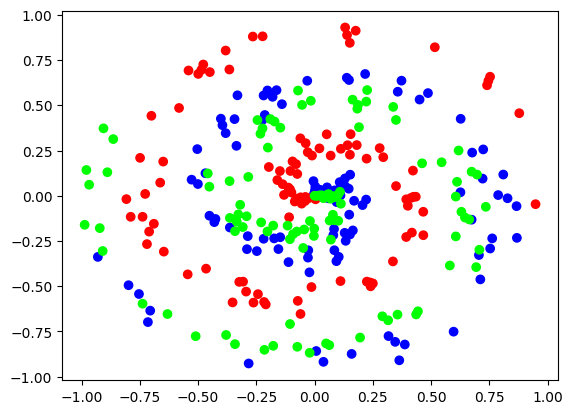

In [14]:
plt.scatter(new_X[:,0],new_X[:,1],c=new_y,cmap='brg')
plt.show()

In [15]:
# create dense layer with 2 inputs and 3 neurons(output values)
layer_1 = Dense(2,3)
# create activation layer to be used with dense layer
activation_1 = ReLU()
# create second dense layer with 3 inputs and 3 neurons(output values)
layer_2 = Dense(3,3)
# create softmax to be used with dense layer
activation_2 = Softmax()
# creating a loss function
loss = CrossEntropyLoss()
# forward pass of first dense layer of our training data

# some helper variables
lowest_loss = 99999 #some initial values
best_dense_weights_1 = layer_1.weights.copy()
best_dense_biases_1 = layer_1.biases.copy()
best_dense_weights_2 = layer_2.weights.copy()
best_dense_biases_2 = layer_2.biases.copy()

for iteration in range(100000):
    # update weights with some random small values
    layer_1.weights += 0.05*np.random.randn(2,3)
    layer_1.biases += 0.05*np.random.randn(1,3)
    layer_2.weights += 0.05*np.random.randn(3,3)
    layer_2.biases += 0.05*np.random.randn(1,3)

    layer_1.forward(new_X)
    # make forward pass with activation layer which makes makes first output of dense layer
    activation_1.forward(layer_1.outputs)
    # make the forward pass of second dense layer
    layer_2.forward(layer_1.outputs)
    # making forward pass of second activation layer which is softmax layer to detect probabelity
    activation_2.forward(layer_2.outputs)
    # printing output of classification
    losses = loss.calculate(activation_2.output,y)
    predictions = np.argmax(activation_2.output,axis=1)
    if len(y.shape) == 2:
        y = np.argmax(new_y,axis=1)
    accuracy = np.mean(predictions == new_y)
    if losses < lowest_loss:
        print(f"New set of weights found Iteration: {iteration}, loss: {losses}, accuracy: {accuracy}")
        best_dense_weights_1 = layer_1.weights.copy()
        best_dense_biases_1 = layer_1.biases.copy()
        best_dense_weights_2 = layer_2.weights.copy()
        best_dense_biases_2 = layer_2.biases.copy()
        lowest_loss = losses
    else:
        layer_1.weights = best_dense_weights_1.copy()
        layer_1.biases = best_dense_biases_1.copy()
        layer_2.weights = best_dense_weights_2.copy()
        layer_2.biases = best_dense_biases_2.copy()

New set of weights found Iteration: 0, loss: 1.099003791809082, accuracy: 0.3333333333333333
New set of weights found Iteration: 7, loss: 1.0988789796829224, accuracy: 0.3333333333333333
New set of weights found Iteration: 11, loss: 1.098677396774292, accuracy: 0.3333333333333333
New set of weights found Iteration: 23, loss: 1.0978938341140747, accuracy: 0.3333333333333333
New set of weights found Iteration: 26, loss: 1.0966302156448364, accuracy: 0.36
New set of weights found Iteration: 29, loss: 1.0964758396148682, accuracy: 0.38666666666666666
New set of weights found Iteration: 30, loss: 1.0951145887374878, accuracy: 0.38
New set of weights found Iteration: 36, loss: 1.0949697494506836, accuracy: 0.33666666666666667
New set of weights found Iteration: 38, loss: 1.094964861869812, accuracy: 0.36666666666666664
New set of weights found Iteration: 44, loss: 1.0947988033294678, accuracy: 0.37
New set of weights found Iteration: 46, loss: 1.094281792640686, accuracy: 0.37666666666666665

In [ ]:
# This methods are not good for complex dataset that's why we need back propogation to achieve more accuracy